# Rosseta Stone Assignment (Α.Μ 8170135)

### To start I will make the country_scores data frame: 

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
from plotnine import *
import scipy.stats.stats as stats

In [2]:
country_scores = pd.read_excel('patel-sandefur-human-capital-final-results.xlsx', sheet_name = 'Country Scores')
country_scores

,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)"
0,U.A.E.,ARE,64.000000,63.982311,437.000000,440.000000
1,Argentina,ARG,51.000000,66.000000,406.652557,431.443542
2,Armenia,ARM,71.505402,NaN,454.000000,NaN
3,Australia,AUS,90.000000,92.932800,520.000000,534.000000
4,Austria,AUT,95.302193,97.104111,511.000000,533.000000
...,...,...,...,...,...,...
73,Turkey,TUR,77.000000,NaN,477.000000,NaN
74,Uruguay,URY,57.000000,70.000000,424.912933,450.448608
75,United States,USA,96.000000,97.517357,544.000000,560.000000
76,Yemen,YEM,9.265388,NaN,243.000000,NaN


### Droping the lines that every column is NaN

In [3]:
country_scores.dropna(how='all')
country_scores.reset_index()
country_scores

,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)"
0,U.A.E.,ARE,64.000000,63.982311,437.000000,440.000000
1,Argentina,ARG,51.000000,66.000000,406.652557,431.443542
2,Armenia,ARM,71.505402,NaN,454.000000,NaN
3,Australia,AUS,90.000000,92.932800,520.000000,534.000000
4,Austria,AUT,95.302193,97.104111,511.000000,533.000000
...,...,...,...,...,...,...
73,Turkey,TUR,77.000000,NaN,477.000000,NaN
74,Uruguay,URY,57.000000,70.000000,424.912933,450.448608
75,United States,USA,96.000000,97.517357,544.000000,560.000000
76,Yemen,YEM,9.265388,NaN,243.000000,NaN


## Q1: Income and Test Results

### Firstly I'm making wdi dataset with some necessary data cleansing

In [4]:
wdi = pd.read_csv('WDI_data.csv')

### Once again dropping all the NaN rows

In [5]:
wdi = wdi.dropna(how='all')
wdi

,Country Name,Country Code,Series Name,Series Code,2015 [YR2015]
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.01648820483
1,Afghanistan,AFG,"School enrollment, primary (% net)",SE.PRM.NENR,..
2,Afghanistan,AFG,"School enrollment, primary (% gross)",SE.PRM.ENRR,107.225357055664
3,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.2925173789
4,Albania,ALB,"School enrollment, primary (% net)",SE.PRM.NENR,95.1996002197266
...,...,...,...,...,...
789,Zimbabwe,ZWE,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1912.28026439598
790,Zimbabwe,ZWE,"School enrollment, primary (% net)",SE.PRM.NENR,..
791,Zimbabwe,ZWE,"School enrollment, primary (% gross)",SE.PRM.ENRR,..
795,Data from database: World Development Indicators,NaN,NaN,NaN,NaN


In [6]:
wdi = wdi.loc[wdi['Series Name'] == 'GDP per capita, PPP (constant 2011 international $)']
wdi.reset_index(drop=True, inplace=True)
wdi

,Country Name,Country Code,Series Name,Series Code,2015 [YR2015]
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.01648820483
1,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.2925173789
2,Algeria,DZA,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,13724.723852895
3,American Samoa,ASM,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,..
4,Andorra,AND,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,..
...,...,...,...,...,...
259,West Bank and Gaza,PSE,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,4339.10369305975
260,World,WLD,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,14766.537605517
261,"Yemen, Rep.",YEM,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,2641.04582911357
262,Zambia,ZMB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,3627.20204093772


In [7]:
wdi = wdi.loc[wdi['2015 [YR2015]'] != '..']
wdi

,Country Name,Country Code,Series Name,Series Code,2015 [YR2015]
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.01648820483
1,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.2925173789
2,Algeria,DZA,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,13724.723852895
5,Angola,AGO,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,6231.06799206401
6,Antigua and Barbuda,ATG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,20154.9474879241
...,...,...,...,...,...
259,West Bank and Gaza,PSE,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,4339.10369305975
260,World,WLD,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,14766.537605517
261,"Yemen, Rep.",YEM,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,2641.04582911357
262,Zambia,ZMB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,3627.20204093772


In [8]:
q1_df = pd.merge(country_scores, 
                 wdi[['2015 [YR2015]','Country Code']],
                on='Country Code',
                how='inner')
q1_df

,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)",2015 [YR2015]
0,U.A.E.,ARE,64.000000,63.982311,437.000000,440.000000,65975.3755468552
1,Argentina,ARG,51.000000,66.000000,406.652557,431.443542,19101.2973920688
2,Armenia,ARM,71.505402,NaN,454.000000,NaN,8195.93364956571
3,Australia,AUS,90.000000,92.932800,520.000000,534.000000,43719.5021648696
4,Austria,AUT,95.302193,97.104111,511.000000,533.000000,44353.8752139122
...,...,...,...,...,...,...,...
73,Turkey,TUR,77.000000,NaN,477.000000,NaN,23388.4813019367
74,Uruguay,URY,57.000000,70.000000,424.912933,450.448608,19831.4458942372
75,United States,USA,96.000000,97.517357,544.000000,560.000000,53029.2933612438
76,Yemen,YEM,9.265388,NaN,243.000000,NaN,2641.04582911357


### Giving some more suitable column names:

In [9]:
q1_df.columns =['Country','Country Code','Percent Above Math Benchmark (400 on TIMSS Scale)','Percent Above Reading Benchmark (400 on PIRLS Scale)','TIMSS','PIRLS','2015 [YR2015]']


In [10]:
q1_df = q1_df.set_index('Country')
q1_df

,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),TIMSS,PIRLS,2015 [YR2015]
Country,,,,,,
U.A.E.,ARE,64.000000,63.982311,437.000000,440.000000,65975.3755468552
Argentina,ARG,51.000000,66.000000,406.652557,431.443542,19101.2973920688
Armenia,ARM,71.505402,NaN,454.000000,NaN,8195.93364956571
Australia,AUS,90.000000,92.932800,520.000000,534.000000,43719.5021648696
Austria,AUT,95.302193,97.104111,511.000000,533.000000,44353.8752139122
...,...,...,...,...,...,...
Turkey,TUR,77.000000,NaN,477.000000,NaN,23388.4813019367
Uruguay,URY,57.000000,70.000000,424.912933,450.448608,19831.4458942372
United States,USA,96.000000,97.517357,544.000000,560.000000,53029.2933612438


In [11]:
q1_df['2015 [YR2015]'] = q1_df['2015 [YR2015]'].astype(float)

In [12]:
q1_df['Log_GDP']=np.log(q1_df['2015 [YR2015]'])

In [13]:
q1_df.head(20)

,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),TIMSS,PIRLS,2015 [YR2015],Log_GDP
Country,,,,,,,
U.A.E.,ARE,64.000000,63.982311,437.000000,440.000000,65975.375547,11.097037
Argentina,ARG,51.000000,66.000000,406.652557,431.443542,19101.297392,9.857512
Armenia,ARM,71.505402,NaN,454.000000,NaN,8195.933650,9.011393
Australia,AUS,90.000000,92.932800,520.000000,534.000000,43719.502165,10.685550
Austria,AUT,95.302193,97.104111,511.000000,533.000000,44353.875214,10.699955
Azerbaijan,AZE,72.284508,81.859566,465.000000,467.000000,16698.863653,9.723096
Burundi,BDI,91.000000,43.000000,476.978455,392.374207,748.415271,6.617958
Benin,BEN,35.000000,35.000000,390.949188,394.196686,1987.167146,7.594465
Burkina Faso,BFA,59.000000,45.000000,422.527435,395.008057,1596.334538,7.375465


### So our first 2 plots that indicates the correlation between test scores and loged income are: 

C:\Python\lib\site-packages\plotnine\layer.py:467: PlotnineWarning: geom_point : Removed 7 rows containing missing values.


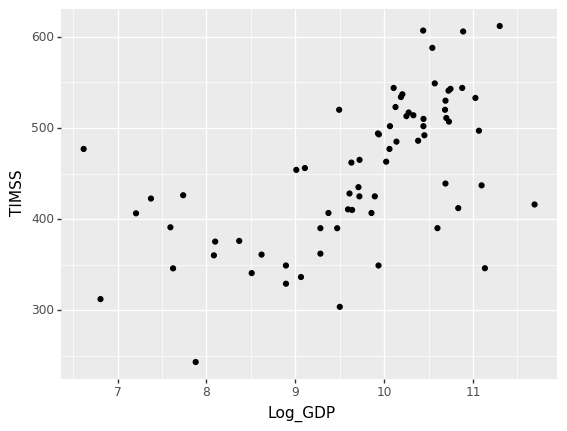

<ggplot: (-9223371906155351508)>

In [14]:
ggplot(data=q1_df) +\
    geom_point(mapping=aes(x='Log_GDP', y='TIMSS'))

C:\Python\lib\site-packages\plotnine\layer.py:467: PlotnineWarning: geom_point : Removed 10 rows containing missing values.


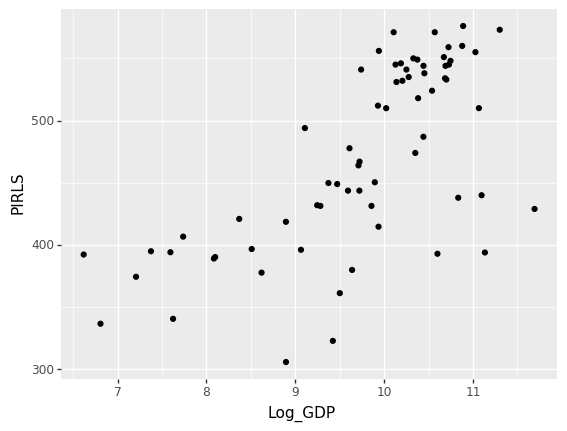

<ggplot: (-9223371906154861432)>

In [15]:
ggplot(data=q1_df) +\
    geom_point(mapping=aes(x='Log_GDP', y='PIRLS'))

### In order to further investigate their relationship I'm going to use bivariate regreasion. To do so I'm breaking my dataframe in two dataframes that contain only Reading or Math score and log GDP

In [16]:
q1_R = q1_df[['PIRLS','Log_GDP']].copy()
q1_R.dropna(inplace=True)
q1_R

,PIRLS,Log_GDP
Country,,
U.A.E.,440.000000,11.097037
Argentina,431.443542,9.857512
Australia,534.000000,10.685550
Austria,533.000000,10.699955
Azerbaijan,467.000000,9.723096
...,...,...
Togo,374.490417,7.207394
Trinidad and Tobago,474.000000,10.350845
Uruguay,450.448608,9.895024


In [17]:
q1_M = q1_df[['TIMSS','Log_GDP']].copy()
q1_M.dropna(inplace=True)
q1_M

,TIMSS,Log_GDP
Country,,
U.A.E.,437.000000,11.097037
Argentina,406.652557,9.857512
Armenia,454.000000,9.011393
Australia,520.000000,10.685550
Austria,511.000000,10.699955
...,...,...
Tunisia,362.000000,9.282648
Turkey,477.000000,10.059999
Uruguay,424.912933,9.895024


### Summary tables for each regreasion are:

In [18]:
mod = smf.ols("PIRLS ~ Log_GDP", data=q1_R)
q1_R_res = mod.fit()
q1_R_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PIRLS   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     55.61
Date:                Mon, 28 Dec 2020   Prob (F-statistic):           2.48e-10
Time:                        23:01:26   Log-Likelihood:                -367.97
No. Observations:                  68   AIC:                             739.9
Df Residuals:                      66   BIC:                             744.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.6191     57.790      0.737      0.463     -72.762     158.000
Log_GDP       43.9124      5.889      7.457      0.000      32.155      55.669
==============================================================================
Omnibus:                       10.020   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.389
Skew:                          -0.951   Prob(JB):                      0.00555
Kurtosis:                       3.226   Cond. No.                         85.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
mod2 = smf.ols("TIMSS ~ Log_GDP", data=q1_M)
q1_M_res = mod2.fit()
q1_M_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  TIMSS   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     37.42
Date:                Mon, 28 Dec 2020   Prob (F-statistic):           5.07e-08
Time:                        23:01:26   Log-Likelihood:                -396.25
No. Observations:                  71   AIC:                             796.5
Df Residuals:                      69   BIC:                             801.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.1170     66.734      0.691      0.492     -87.013     179.247
Log_GDP       41.7460      6.824      6.117      0.000      28.132      55.360
==============================================================================
Omnibus:                        1.225   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.542   Jarque-Bera (JB):                1.078
Skew:                          -0.298   Prob(JB):                        0.583
Kurtosis:                       2.898   Cond. No.                         85.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Q2: Years of Schooling and Test Scores

### Firstly I'm making the scl_y dataframe that contains average years of schooling data

In [20]:
scl_y = pd.read_stata('BL2013_MF1599_v2.2.dta')
scl_y = scl_y.loc[scl_y['year'] == 2010.0]
scl_y

,BLcode,country,year,sex,agefrom,ageto,lu,lp,lpc,ls,lsc,lh,lhc,yr_sch,yr_sch_pri,yr_sch_sec,yr_sch_ter,pop,WBcode,region_code
12,1.0,Algeria,2010.0,MF,15.0,999.0,21.124104,43.897926,25.876770,23.205688,17.081598,11.772276,6.663670,6.678049,4.191919,2.117411,0.368719,25853.0,DZA,Middle East and North Africa
25,3.0,Benin,2010.0,MF,15.0,999.0,53.908321,18.656332,12.183230,23.672802,17.771658,3.762543,2.008301,4.430164,2.571308,1.743440,0.115417,5579.0,BEN,Sub-Saharan Africa
38,4.0,Botswana,2010.0,MF,15.0,999.0,9.826900,6.240109,4.759118,80.042625,29.029333,3.890366,2.022110,9.554915,6.260282,3.176384,0.118250,1107.0,BWA,Sub-Saharan Africa
51,6.0,Burundi,2010.0,MF,15.0,999.0,50.430645,39.345234,25.978859,9.183236,4.968499,1.040882,0.544171,3.346481,2.781254,0.533526,0.031701,5068.0,BDI,Sub-Saharan Africa
64,7.0,Cameroon,2010.0,MF,15.0,999.0,20.732958,47.911888,31.252216,28.285789,15.275344,3.069362,1.635491,6.154877,4.256232,1.804547,0.094097,10766.0,CMR,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,326.0,Republic of Moldova,2010.0,MF,15.0,999.0,0.976749,6.086153,3.653862,78.326561,54.266289,14.610540,8.756674,10.404020,3.912284,6.024392,0.467344,2982.0,ROM,Europe and Central Asia
1858,329.0,Serbia,2010.0,MF,15.0,999.0,2.960607,8.992959,7.690698,73.507530,48.711517,14.538917,8.968564,10.845333,6.029522,4.345661,0.470150,8667.0,SER,Europe and Central Asia
1871,331.0,Slovenia,2010.0,MF,15.0,999.0,0.657998,3.077496,2.661207,76.408531,56.119919,19.855972,13.252562,11.890487,6.387317,4.841000,0.662170,1700.0,SVN,Europe and Central Asia
1884,342.0,"China, Macao Special Administrative Region",2010.0,MF,15.0,999.0,3.457963,21.363201,16.163477,58.113544,32.111195,17.065292,10.434196,8.543072,4.873250,3.119832,0.549990,416.0,MAC,East Asia and the Pacific


### Changing WBcode column name in order to be able to merge with wdi later

In [21]:
scl_y['Country Code'] = scl_y['WBcode']
scl_y = scl_y.reset_index()

In [22]:
scl_y.drop(['WBcode'], axis=1)

,index,BLcode,country,year,sex,agefrom,ageto,lu,lp,lpc,...,lsc,lh,lhc,yr_sch,yr_sch_pri,yr_sch_sec,yr_sch_ter,pop,region_code,Country Code
0,12,1.0,Algeria,2010.0,MF,15.0,999.0,21.124104,43.897926,25.876770,...,17.081598,11.772276,6.663670,6.678049,4.191919,2.117411,0.368719,25853.0,Middle East and North Africa,DZA
1,25,3.0,Benin,2010.0,MF,15.0,999.0,53.908321,18.656332,12.183230,...,17.771658,3.762543,2.008301,4.430164,2.571308,1.743440,0.115417,5579.0,Sub-Saharan Africa,BEN
2,38,4.0,Botswana,2010.0,MF,15.0,999.0,9.826900,6.240109,4.759118,...,29.029333,3.890366,2.022110,9.554915,6.260282,3.176384,0.118250,1107.0,Sub-Saharan Africa,BWA
3,51,6.0,Burundi,2010.0,MF,15.0,999.0,50.430645,39.345234,25.978859,...,4.968499,1.040882,0.544171,3.346481,2.781254,0.533526,0.031701,5068.0,Sub-Saharan Africa,BDI
4,64,7.0,Cameroon,2010.0,MF,15.0,999.0,20.732958,47.911888,31.252216,...,15.275344,3.069362,1.635491,6.154877,4.256232,1.804547,0.094097,10766.0,Sub-Saharan Africa,CMR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,1845,326.0,Republic of Moldova,2010.0,MF,15.0,999.0,0.976749,6.086153,3.653862,...,54.266289,14.610540,8.756674,10.404020,3.912284,6.024392,0.467344,2982.0,Europe and Central Asia,ROM
142,1858,329.0,Serbia,2010.0,MF,15.0,999.0,2.960607,8.992959,7.690698,...,48.711517,14.538917,8.968564,10.845333,6.029522,4.345661,0.470150,8667.0,Europe and Central Asia,SER
143,1871,331.0,Slovenia,2010.0,MF,15.0,999.0,0.657998,3.077496,2.661207,...,56.119919,19.855972,13.252562,11.890487,6.387317,4.841000,0.662170,1700.0,Europe and Central Asia,SVN
144,1884,342.0,"China, Macao Special Administrative Region",2010.0,MF,15.0,999.0,3.457963,21.363201,16.163477,...,32.111195,17.065292,10.434196,8.543072,4.873250,3.119832,0.549990,416.0,East Asia and the Pacific,MAC


### Droping all the useless columns

In [23]:
scl_y = scl_y[['country','yr_sch','Country Code']]
scl_y

,country,yr_sch,Country Code
0,Algeria,6.678049,DZA
1,Benin,4.430164,BEN
2,Botswana,9.554915,BWA
3,Burundi,3.346481,BDI
4,Cameroon,6.154877,CMR
...,...,...,...
141,Republic of Moldova,10.404020,ROM
142,Serbia,10.845333,SER
143,Slovenia,11.890487,SVN
144,"China, Macao Special Administrative Region",8.543072,MAC


In [24]:
scl_y_gdp = pd.merge(scl_y, q1_df[['Country Code','Log_GDP']], on = 'Country Code', how = 'inner')
scl_y_gdp

,country,yr_sch,Country Code,Log_GDP
0,Benin,4.430164,BEN,7.594465
1,Botswana,9.554915,BWA,9.639291
2,Burundi,3.346481,BDI,6.617958
3,Cameroon,6.154877,CMR,8.098358
4,Congo,5.941449,COG,8.620272
...,...,...,...,...
67,Kazakhstan,11.326516,KAZ,10.065704
68,Qatar,8.432807,QAT,11.693157
69,Croatia,11.296732,HRV,9.940737
70,Lithuania,10.894826,LTU,10.205284


### Making the final matrix i'm going to use for school years and loged gdp regression

In [25]:
q2_df_0 = scl_y_gdp
q2_df_0 = q2_df_0.set_index('country')
q2_df_0 = q2_df_0.drop('Country Code',axis=1)
q2_df_0

,yr_sch,Log_GDP
country,,
Benin,4.430164,7.594465
Botswana,9.554915,9.639291
Burundi,3.346481,6.617958
Cameroon,6.154877,8.098358
Congo,5.941449,8.620272
...,...,...
Kazakhstan,11.326516,10.065704
Qatar,8.432807,11.693157
Croatia,11.296732,9.940737


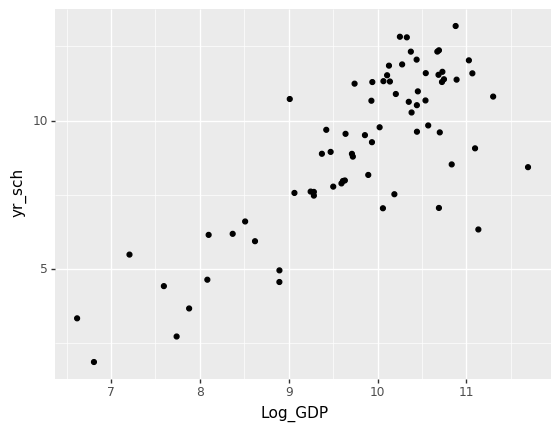

<ggplot: (-9223371906154791540)>

In [26]:
ggplot(data=q2_df_0) +\
    geom_point(mapping=aes(x='Log_GDP', y='yr_sch'))

In [27]:
mod3 = smf.ols("yr_sch ~ Log_GDP", data=q2_df_0)
q2_0_res = mod3.fit()
q2_0_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yr_sch   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     110.6
Date:                Mon, 28 Dec 2020   Prob (F-statistic):           4.74e-16
Time:                        23:01:27   Log-Likelihood:                -138.89
No. Observations:                  72   AIC:                             281.8
Df Residuals:                      70   BIC:                             286.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.1310      1.838     -5.512      0.000     -13.797      -6.465
Log_GDP        1.9594      0.186     10.515      0.000       1.588       2.331
==============================================================================
Omnibus:                        8.402   Durbin-Watson:                   1.504
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                7.855
Skew:                          -0.724   Prob(JB):                       0.0197
Kurtosis:                       3.723   Cond. No.                         92.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
residuals=q2_0_res.resid.to_frame().rename(columns={0: 'yr_resid'})
residuals['pirls_resid']=q1_R_res.resid.to_frame()
residuals['timss_resid']=q1_M_res.resid.to_frame()

In [29]:
residuals.columns = ['Years_of_Schooling','PIRLS_score','TIMMS_score']

### So reading test scores (residualized) and years of schooling (residualized), correlation can be observed below from the plot and the regression summary report 

C:\Python\lib\site-packages\plotnine\layer.py:467: PlotnineWarning: geom_point : Removed 17 rows containing missing values.


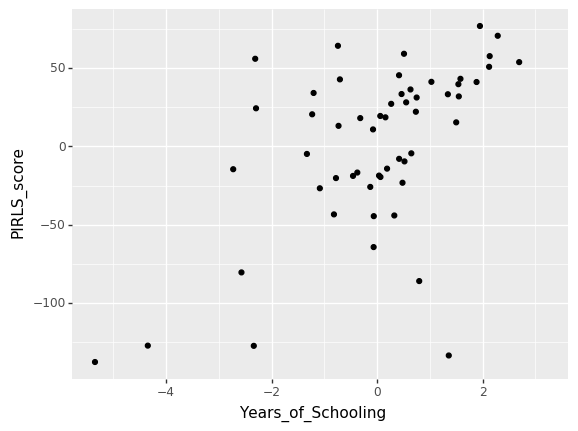

<ggplot: (-9223371906154805216)>

In [30]:
ggplot(data=residuals) +\
    geom_point(mapping=aes(x='Years_of_Schooling', y='PIRLS_score'))

In [31]:
mod4 = smf.ols("PIRLS_score ~ Years_of_Schooling", data=residuals)
q2_R_res = mod4.fit()
q2_R_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PIRLS_score   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     24.35
Date:                Mon, 28 Dec 2020   Prob (F-statistic):           8.35e-06
Time:                        23:01:27   Log-Likelihood:                -285.12
No. Observations:                  55   AIC:                             574.2
Df Residuals:                      53   BIC:                             578.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.2409      5.930      0.209      0.835     -10.652      13.134
Years_of_Schooling    18.7119      3.792      4.935      0.000      11.106      26.317
==============================================================================
Omnibus:                       14.973   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.475
Skew:                          -0.928   Prob(JB):                     2.17e-05
Kurtosis:                       5.434   Cond. No.                         1.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### So math test scores (residualized) and years of schooling (residualized), correlation can be observed below from the plot and the regression summary report 

C:\Python\lib\site-packages\plotnine\layer.py:467: PlotnineWarning: geom_point : Removed 16 rows containing missing values.


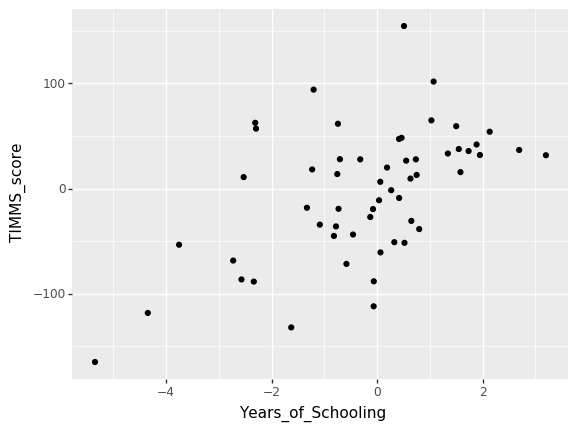

<ggplot: (-9223371906154804144)>

In [32]:
ggplot(data=residuals) +\
    geom_point(mapping=aes(x='Years_of_Schooling', y='TIMMS_score'))

In [33]:
mod5 = smf.ols("TIMMS_score ~ Years_of_Schooling", data=residuals)
q2_M_res = mod5.fit()
q2_M_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TIMMS_score   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     21.87
Date:                Mon, 28 Dec 2020   Prob (F-statistic):           1.99e-05
Time:                        23:01:28   Log-Likelihood:                -300.19
No. Observations:                  56   AIC:                             604.4
Df Residuals:                      54   BIC:                             608.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.4259      7.065      0.060      0.952     -13.739      14.590
Years_of_Schooling    19.6328      4.198      4.677      0.000      11.216      28.050
==============================================================================
Omnibus:                        3.807   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.149   Jarque-Bera (JB):                2.820
Skew:                           0.495   Prob(JB):                        0.244
Kurtosis:                       3.478   Cond. No.                         1.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Q3: Compare New and Previous Estimates

In [34]:
hlo = pd.read_stata('HLO Panel Data (mean, thresh) - Jan 2018.dta')
hlo

,country,idcntry,cntabb,year,HLO,low_threshold
0,"Abu Dhabi, UAE",7842,ADA,1965,NaN,NaN
1,"Abu Dhabi, UAE",7842,ADA,1970,NaN,NaN
2,"Abu Dhabi, UAE",7842,ADA,1975,NaN,NaN
3,"Abu Dhabi, UAE",7842,ADA,1980,NaN,NaN
4,"Abu Dhabi, UAE",7842,ADA,1985,NaN,NaN
...,...,...,...,...,...,...
1844,Zimbabwe,716,ZWE,1995,NaN,NaN
1845,Zimbabwe,716,ZWE,2000,NaN,NaN
1846,Zimbabwe,716,ZWE,2005,342.98999,48.27
1847,Zimbabwe,716,ZWE,2010,NaN,NaN


### Making some modifications to hlo colums for easier processing (e.g merging) later on

In [35]:
hlo = hlo[['country','cntabb','year','low_threshold']]
hlo.columns = ['country','Country Code','year','low_threshold']
hlo

,country,Country Code,year,low_threshold
0,"Abu Dhabi, UAE",ADA,1965,NaN
1,"Abu Dhabi, UAE",ADA,1970,NaN
2,"Abu Dhabi, UAE",ADA,1975,NaN
3,"Abu Dhabi, UAE",ADA,1980,NaN
4,"Abu Dhabi, UAE",ADA,1985,NaN
...,...,...,...,...
1844,Zimbabwe,ZWE,1995,NaN
1845,Zimbabwe,ZWE,2000,NaN
1846,Zimbabwe,ZWE,2005,48.27
1847,Zimbabwe,ZWE,2010,NaN


In [36]:
hlo = hlo.loc[hlo['low_threshold'].notna()]
hlo

,country,Country Code,year,low_threshold
9,"Abu Dhabi, UAE",ADA,2010,73.830002
10,"Abu Dhabi, UAE",ADA,2015,73.750000
18,Albania,ALB,2000,57.750000
19,Albania,ALB,2005,60.150002
20,Albania,ALB,2010,61.320000
...,...,...,...,...
1824,Zambia,ZMB,2005,27.500000
1833,Zanzibar,ZAN,1995,17.840000
1834,Zanzibar,ZAN,2000,34.330002
1835,Zanzibar,ZAN,2005,38.040001


### Making 'year' column integer type, so I can compare years and keep the latest estimate of each year

In [37]:
hlo['year'] = hlo['year'].astype(int)

C:\Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### In the following field, I'm sorting the dataframe at first by year, in order to be sure that when I keep the first of each group of duplicates of countries, I keep the latest one("biggest" year), and then I resort by country just for organizational reasons

In [38]:
hlo = hlo.sort_values(by='year', ascending=False)
hlo = hlo.drop_duplicates(subset='country', keep="first")
hlo = hlo.sort_values(by='country')
hlo.reset_index(drop=True, inplace=True)
hlo

,country,Country Code,year,low_threshold
0,"Abu Dhabi, UAE",ADA,2015,73.750000
1,Albania,ALB,2015,70.650002
2,Algeria,DZA,2015,51.310001
3,Argentina,ARG,2015,70.860001
4,"Argentina, Buenos Aires",ARB,2015,67.750000
...,...,...,...,...
153,Vietnam,VNM,2015,91.180000
154,Yemen,YEM,2010,40.000000
155,Zambia,ZMB,2005,27.500000
156,Zanzibar,ZAN,2005,38.040001


In [39]:
q3_df = pd.merge(hlo,q1_df[['Percent Above Math Benchmark (400 on TIMSS Scale)','Percent Above Reading Benchmark (400 on PIRLS Scale)','Country Code']],on='Country Code',how='inner')
q3_df

,country,Country Code,year,low_threshold,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale)
0,Argentina,ARG,2015,70.860001,51.000000,66.000000
1,Armenia,ARM,2010,86.129997,71.505402,NaN
2,Australia,AUS,2015,91.529999,90.000000,92.932800
3,Austria,AUT,2015,88.510002,95.302193,97.104111
4,Azerbaijan,AZE,2010,77.459999,72.284508,81.859566
...,...,...,...,...,...,...
72,Turkey,TUR,2015,79.449997,77.000000,NaN
73,USA,USA,2015,93.300003,96.000000,97.517357
74,United Arab Emirates,ARE,2015,80.839996,64.000000,63.982311
75,Uruguay,URY,2015,72.650002,57.000000,70.000000


In [40]:
q3_df.columns = ['country','Country Code','year','low_threshold','P.A.M.B(400 on TIMSS Scale)','P.A.R.B(400 on PIRLS Scale)']

In [41]:
q3_M = q3_df[['low_threshold','P.A.M.B(400 on TIMSS Scale)']]
q3_M

,low_threshold,P.A.M.B(400 on TIMSS Scale)
0,70.860001,51.000000
1,86.129997,71.505402
2,91.529999,90.000000
3,88.510002,95.302193
4,77.459999,72.284508
...,...,...
72,79.449997,77.000000
73,93.300003,96.000000
74,80.839996,64.000000
75,72.650002,57.000000


In [42]:
q3_M.isna().sum()

low_threshold                  0
P.A.M.B(400 on TIMSS Scale)    8
dtype: int64

In [43]:
q3_M = q3_M.dropna()

In [44]:
q3_R = q3_df[['low_threshold','P.A.R.B(400 on PIRLS Scale)']]
q3_R = q3_R.dropna()
q3_R

,low_threshold,P.A.R.B(400 on PIRLS Scale)
0,70.860001,66.000000
2,91.529999,92.932800
3,88.510002,97.104111
4,77.459999,81.859566
6,24.350000,35.000000
...,...,...
69,39.049999,27.000000
70,70.300003,77.998352
73,93.300003,97.517357
74,80.839996,63.982311


### Let's see the Spearman test results for each kind of tests

In [45]:
print('Spearman TIMSS', stats.spearmanr(q3_M['low_threshold'], q3_M['P.A.M.B(400 on TIMSS Scale)']))

Spearman TIMSS SpearmanrResult(correlation=0.8973790562032015, pvalue=1.6879737641244243e-25)


In [46]:
print('Spearman PIRLS', stats.spearmanr(q3_R['low_threshold'], q3_R['P.A.R.B(400 on PIRLS Scale)']))

Spearman PIRLS SpearmanrResult(correlation=0.9045173418249431, pvalue=5.2905847721937165e-25)


### As you can see the correlation is very close to 0.90 for both cases, just like the original paper

### Here we have the corresponding plots

C:\Python\lib\site-packages\plotnine\layer.py:467: PlotnineWarning: geom_text : Removed 8 rows containing missing values.


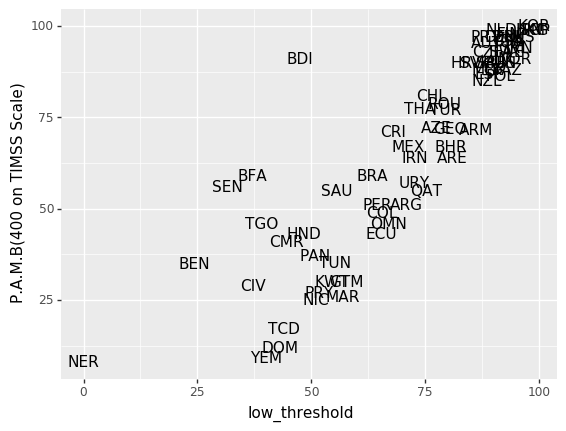

<ggplot: (-9223371906156464496)>

In [47]:
ggplot(data=q3_df) +\
geom_text(mapping=aes(x='low_threshold', y='P.A.M.B(400 on TIMSS Scale)'),label=q3_df['Country Code'])

C:\Python\lib\site-packages\plotnine\layer.py:467: PlotnineWarning: geom_text : Removed 12 rows containing missing values.


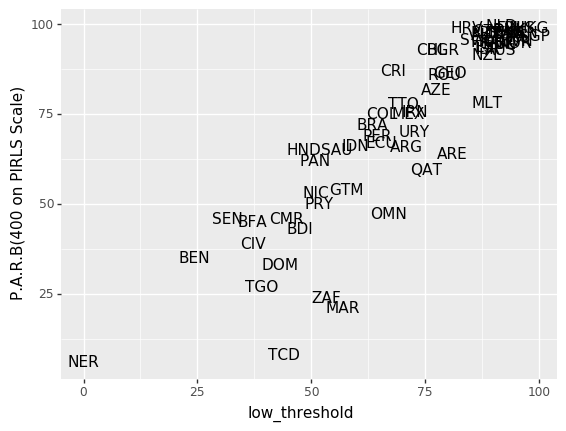

<ggplot: (-9223371906156497348)>

In [48]:
ggplot(data=q3_df) +\
geom_text(mapping=aes(x='low_threshold', y='P.A.R.B(400 on PIRLS Scale)'),label=q3_df['Country Code'])

## Q4: Skills Intensity

### To start let's organize the data as needed in order to reach the point I can run the regressions

In [49]:
grads = pd.read_csv('usa_00001.csv')
grads = grads[['PERWT','EDUC','IND']]
grads

,PERWT,EDUC,IND
0,618.0,8,797
1,684.0,8,467
2,618.0,6,359
3,609.0,6,617
4,621.0,6,877
...,...,...,...
371613,606.0,6,708
371614,494.0,1,0
371615,556.0,6,337
371616,600.0,6,759


### In order to find the portion of the high school and college graduates, in the following rows i'm finding the total ammount of persons that heave the corresponding education per industry and dividing them by the total ammount of persons of each industry.   

#### (portion-high-school_ind = (sum_perwt_ind : educ >= 6) / total_perwt_ind ) 
#### (portion-college_ind = (sum_perwt_ind : educ >= 10) / total_perwt_ind )

#### (I'm sorting the dataset so I can understand its structure better )

In [50]:
col_grads = grads.loc[grads['EDUC'] >= 10]
col_grads = col_grads.sort_values(by='IND', ascending=False)
col_grads.reset_index(drop=True,inplace = True)
col_grads

,PERWT,EDUC,IND
0,635.0,10,992
1,603.0,11,992
2,628.0,10,992
3,615.0,11,992
4,609.0,10,992
...,...,...,...
69967,595.0,11,0
69968,627.0,10,0
69969,614.0,11,0
69970,567.0,11,0


### I'm doing that by grouping by industry and summing up the PERWT (beacause perwt is persons weight, that indicates the nuber of people that have the charateristics of each row) 

In [51]:
col_sum = col_grads.groupby('IND').apply(lambda x: np.sum(x.PERWT))
col_sum

IND
0      5117532.0
17      133389.0
18       70935.0
19       10095.0
27        7917.0
         ...    
977      19135.0
978       5411.0
979      14043.0
987       8663.0
992      56046.0
Length: 265, dtype: float64

In [52]:
pr_sum = grads.groupby('IND').apply(lambda x: np.sum(x.PERWT))

In [53]:
scl_grads = grads.loc[grads['EDUC'] >= 6]

In [54]:
scl_sum = scl_grads.groupby('IND').apply(lambda x: np.sum(x.PERWT))

### I'm making dataframes the produced lists in order to be sure that they are going to be merged properly on their index that is the corresponding industry.

In [55]:
pr_sm = pd.DataFrame(data=pr_sum)

In [56]:
col_sm = pd.DataFrame(data=col_sum)
scl_sm = pd.DataFrame(data=scl_sum)
col_sm.columns = ['COL_SUM']
scl_sm.columns = ['SCL_SUM']
col_sm

,COL_SUM
IND,
0,5117532.0
17,133389.0
18,70935.0
19,10095.0
27,7917.0
...,...
977,19135.0
978,5411.0
979,14043.0


In [57]:
skills_intensity_industry = pd.merge(scl_sm, col_sm, left_index=True, right_index=True)

In [58]:
skills_intensity_industry['IND'] = skills_intensity_industry.index

In [59]:
skills_intensity_industry.reset_index(drop=True, inplace=True)

In [60]:
skills_intensity_industry = skills_intensity_industry.merge(pr_sm,left_on='IND',right_index=True)

In [61]:
skills_intensity_industry.columns = ['SCL_SUM','COL_SUM','IND','PR_SUM']


In [62]:
skills_intensity_industry['EDUC_SCL'] = skills_intensity_industry['SCL_SUM']/skills_intensity_industry['PR_SUM']
skills_intensity_industry['EDUC_COL'] = skills_intensity_industry['COL_SUM']/skills_intensity_industry['PR_SUM']
skills_intensity_industry

,SCL_SUM,COL_SUM,IND,PR_SUM,EDUC_SCL,EDUC_COL
0,28314555.0,5117532.0,0,108371644.0,0.261273,0.047222
1,806904.0,133389.0,17,1391515.0,0.579874,0.095859
2,516534.0,70935.0,18,723084.0,0.714349,0.098101
3,29645.0,10095.0,19,32080.0,0.924096,0.314682
4,112982.0,7917.0,27,147320.0,0.766916,0.053740
...,...,...,...,...,...,...
260,95770.0,19135.0,977,96866.0,0.988685,0.197541
261,24851.0,5411.0,978,27502.0,0.903607,0.196749
262,43710.0,14043.0,979,45195.0,0.967142,0.310720
263,35947.0,8663.0,987,37237.0,0.965357,0.232645


### So now the skills_intensity_industry df, consists of: [number of school graduates of industry][number of college graduates of industry][industry code][total industry workers][portion of school graduates][portion of college graduates] respectively

In [63]:
new_w = pd.read_stata('cw_ind2000_ind1990ddx.dta')

In [64]:
new_w.columns = ['IND','IND1990','weight']
new_w

,IND,IND1990,weight
0,17,10,0.994016
1,17,31,0.002637
2,17,121,0.001740
3,17,561,0.001607
4,18,11,0.990907
...,...,...,...
707,957,922,0.009144
708,957,931,0.983767
709,959,700,0.038986
710,959,910,0.041877


In [65]:
new_w = new_w.merge(skills_intensity_industry[['EDUC_SCL','EDUC_COL','IND']], on='IND', how='inner')
new_w

,IND,IND1990,weight,EDUC_SCL,EDUC_COL
0,17,10,0.994016,0.579874,0.095859
1,17,31,0.002637,0.579874,0.095859
2,17,121,0.001740,0.579874,0.095859
3,17,561,0.001607,0.579874,0.095859
4,18,11,0.990907,0.714349,0.098101
...,...,...,...,...,...
706,957,922,0.009144,0.954899,0.377846
707,957,931,0.983767,0.954899,0.377846
708,959,700,0.038986,0.985124,0.326841
709,959,910,0.041877,0.985124,0.326841


In [66]:
new_w['EDUC_SCL1990'] = new_w['weight']*new_w['EDUC_SCL']
new_w['EDUC_COL1990'] = new_w['weight']*new_w['EDUC_COL']

### Now we have the portions mapped to 1990 codes and reweighted

In [67]:
new_w

,IND,IND1990,weight,EDUC_SCL,EDUC_COL,EDUC_SCL1990,EDUC_COL1990
0,17,10,0.994016,0.579874,0.095859,0.576404,0.095285
1,17,31,0.002637,0.579874,0.095859,0.001529,0.000253
2,17,121,0.001740,0.579874,0.095859,0.001009,0.000167
3,17,561,0.001607,0.579874,0.095859,0.000932,0.000154
4,18,11,0.990907,0.714349,0.098101,0.707853,0.097209
...,...,...,...,...,...,...,...
706,957,922,0.009144,0.954899,0.377846,0.008732,0.003455
707,957,931,0.983767,0.954899,0.377846,0.939398,0.371713
708,959,700,0.038986,0.985124,0.326841,0.038406,0.012742
709,959,910,0.041877,0.985124,0.326841,0.041254,0.013687


In [68]:
new_w.loc[new_w['IND1990'] == 132]

,IND,IND1990,weight,EDUC_SCL,EDUC_COL,EDUC_SCL1990,EDUC_COL1990
82,149,132,0.179986,0.730056,0.134062,0.131400,0.024129
87,159,132,0.056122,0.689564,0.119044,0.038699,0.006681
93,167,132,0.735887,0.618344,0.033114,0.455031,0.024368
96,168,132,0.009605,0.582634,0.071195,0.005596,0.000684


### As you can see in the query above, the 1990 codes are mapped to more than one 2000 codes (as well as the opposite way). That's why I'm making the groupby 4 rows below. Also i'm summing the portions because the weights indicate that each row is a part of the whole entity of each industry. So by summing I'm gathering almost the whole industry portions (to the extend possible)

In [69]:
skills_intensity_industry = new_w[['IND1990','EDUC_SCL1990','EDUC_COL1990']]

In [70]:
skills_intensity_industry.columns = ['IND','EDUC_SCL1990','EDUC_COL1990']

In [71]:
skills_intensity_industry

,IND,EDUC_SCL1990,EDUC_COL1990
0,10,0.576404,0.095285
1,31,0.001529,0.000253
2,121,0.001009,0.000167
3,561,0.000932,0.000154
4,11,0.707853,0.097209
...,...,...,...
706,922,0.008732,0.003455
707,931,0.939398,0.371713
708,700,0.038406,0.012742
709,910,0.041254,0.013687


In [72]:
skills_intensity_industry = skills_intensity_industry.groupby('IND',as_index=False).sum()

In [73]:
skills_intensity_industry

,IND,EDUC_SCL1990,EDUC_COL1990
0,10,0.811546,0.150558
1,11,0.707853,0.097209
2,20,2.010865,0.559366
3,31,1.059608,0.346429
4,32,0.648069,0.174943
...,...,...,...
217,921,0.990417,0.350704
218,922,0.866422,0.404272
219,930,0.641594,0.344167
220,931,1.031781,0.413946


In [74]:
export_records = pd.read_csv('BACI_HS17_Y2018_V202001.csv')
export_records.columns = ['t','i','j','hs6','value','q']
export_records

,t,i,j,hs6,value,q
0,2018,4,24,845420,101.397000,26.000000
1,2018,4,24,848180,2.328000,0.007000
2,2018,4,31,570110,1.596000,0.037000
3,2018,4,32,340319,8.699331,0.113000
4,2018,4,32,610910,1.098000,0.013000
...,...,...,...,...,...,...
7738898,2018,894,842,960190,76.858000,5.075000
7738899,2018,894,842,970190,4.519000,0.214000
7738900,2018,894,842,970500,93.706896,2.786751
7738901,2018,894,854,100510,2.141000,0.412000


In [75]:
sic = pd.read_stata('cw_hs6_sic87dd.dta')
sic

,hs6,sic87dd,share,weights_method
0,10110.0,272.0,1.000000,no weights needed
1,10111.0,272.0,1.000000,no weights needed
2,10119.0,272.0,1.000000,no weights needed
3,10120.0,272.0,1.000000,no weights needed
4,10190.0,272.0,1.000000,no weights needed
...,...,...,...,...
6747,640419.0,NaN,0.084449,trade-based allocated 314X imports
6748,640420.0,NaN,0.012955,trade-based allocated 314X imports
6749,640510.0,NaN,0.121528,trade-based allocated 314X imports
6750,640520.0,NaN,0.192258,trade-based allocated 314X imports


In [76]:
sic = sic[sic['sic87dd'].notna()]

In [77]:
sic['sic87dd'] = sic['sic87dd'].astype(int)

C:\Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [78]:
sic['sic87dd'].nunique()

455

In [79]:
ex_r_2 = pd.merge(sic[['hs6','sic87dd','share']],export_records[['i','hs6','value']], on='hs6',how='inner')
ex_r_2

,hs6,sic87dd,share,i,value
0,10190.0,272,1.0,32,306.137000
1,10190.0,272,1.0,36,245.604000
2,10190.0,272,1.0,36,1.230000
3,10190.0,272,1.0,36,3.543000
4,10190.0,272,1.0,40,4.435000
...,...,...,...,...,...
9473507,970600.0,9200,1.0,858,4.687872
9473508,970600.0,9200,1.0,858,69.605152
9473509,970600.0,9200,1.0,860,164.802000
9473510,970600.0,9200,1.0,860,781.367000


### In ex_r_2 df we have the hs6 code, mapped to the sic87 industry codes, and the adjusted value of each product

In [80]:
ex_r_2['value_adj'] = ex_r_2['share']*ex_r_2['value']
ex_r_2

,hs6,sic87dd,share,i,value,value_adj
0,10190.0,272,1.0,32,306.137000,306.137000
1,10190.0,272,1.0,36,245.604000,245.604000
2,10190.0,272,1.0,36,1.230000,1.230000
3,10190.0,272,1.0,36,3.543000,3.543000
4,10190.0,272,1.0,40,4.435000,4.435000
...,...,...,...,...,...,...
9473507,970600.0,9200,1.0,858,4.687872,4.687872
9473508,970600.0,9200,1.0,858,69.605152,69.605152
9473509,970600.0,9200,1.0,860,164.802000,164.802000
9473510,970600.0,9200,1.0,860,781.367000,781.367000


### In ex_r_3 df we have the aggregate adjusted value, per country, per industry

In [81]:
ex_r_3 = ex_r_2.groupby(['i','sic87dd'],as_index=False).sum()
ex_r_3

,i,sic87dd,hs6,share,value,value_adj
0,4,119,1883727.0,25.552067,68291.848724,68290.428330
1,4,131,2600500.0,5.000000,39698.892614,39698.892614
2,4,132,240130.0,1.000000,43.993665,43.993665
3,4,134,280760.0,4.000000,380.462682,380.462682
4,4,139,4671499.0,33.851410,14319.923893,13308.065785
...,...,...,...,...,...,...
67623,894,3996,391810.0,0.981890,1.928000,1.893083
67624,894,3999,30950728.0,30.902012,5777.692384,4143.753862
67625,894,9100,27414346.0,38.391140,46122.313240,45340.133460
67626,894,9200,65238784.0,56.067509,15068.458988,2643.833137


### And for our final mapping we map 1990 codes with sic87...

In [82]:
sic87_1990 = pd.read_stata('cw_sic87_ind1990ddx.dta')
sic87_1990.columns = ['ind1990','sic87dd']
sic87_1990

,ind1990,sic87dd
0,10,111
1,10,112
2,10,115
3,10,116
4,10,119
...,...,...
999,931,9641
1000,931,9651
1001,931,9661
1002,932,9711


In [83]:
ex_r_3 = ex_r_3.merge(sic87_1990,on='sic87dd')

In [84]:
ex_r_3

,i,sic87dd,hs6,share,value,value_adj,ind1990
0,4,119,1883727.0,25.552067,68291.848724,68290.428330,10
1,8,119,1457760.0,9.103069,626.318915,480.879539,10
2,12,119,901969.0,7.509774,152.135916,104.191222,10
3,16,119,71333.0,1.000000,2.329000,2.329000,10
4,20,119,100590.0,0.021786,6.597711,0.143736,10
...,...,...,...,...,...,...,...
67047,757,3761,5281560.0,2.182873,18171.410000,6610.981339,362
67048,784,3761,1760520.0,0.727624,30247.591000,11004.443775,362
67049,792,3761,880260.0,0.363812,77.426000,28.168526,362
67050,826,3761,14964420.0,6.184808,377692.594728,137409.188156,362


In [85]:
c_codes = pd.read_csv('country_codes_V202001.csv',encoding='ISO-8859-1')
c_codes

,country_code,country_name_abbreviation,country_name_full,iso_2digit_alpha,iso_3digit_alpha
0,4,Afghanistan,Afghanistan,AF,AFG
1,8,Albania,Albania,AL,ALB
2,12,Algeria,Algeria,DZ,DZA
3,16,American Samoa,American Samoa,AS,ASM
4,20,Andorra,Andorra,AD,AND
...,...,...,...,...,...
222,876,Wallis and Futuna Isds,Wallis and Futuna Islands,WF,WLF
223,882,Samoa,Samoa,WS,WSM
224,887,Yemen,Yemen,YE,YEM
225,891,Serbia and Montenegro,Serbia and Montenegro,CS,SCG


In [86]:
ex_r_3.columns = ['country_code','sic87dd','hs6','share','value','value_adj','IND']

In [87]:
exports = pd.merge(ex_r_3[['country_code','sic87dd','value_adj','IND']],c_codes[['country_code','iso_3digit_alpha']],on='country_code',how='inner')
exports

,country_code,sic87dd,value_adj,IND,iso_3digit_alpha
0,4,119,68290.428330,10,AFG
1,4,131,39698.892614,10,AFG
2,4,132,43.993665,10,AFG
3,4,134,380.462682,10,AFG
4,4,139,13308.065785,10,AFG
...,...,...,...,...,...
67047,876,3845,0.887108,372,WLF
67048,876,3931,5.907000,390,WLF
67049,876,3272,0.984572,251,WLF
67050,876,3273,0.058428,251,WLF


In [88]:
exports = exports.drop(['country_code','sic87dd'],axis=1)

In [89]:
exports.columns = ['value_adj','IND','Country Code']
exports

,value_adj,IND,Country Code
0,68290.428330,10,AFG
1,39698.892614,10,AFG
2,43.993665,10,AFG
3,380.462682,10,AFG
4,13308.065785,10,AFG
...,...,...,...
67047,0.887108,372,WLF
67048,5.907000,390,WLF
67049,0.984572,251,WLF
67050,0.058428,251,WLF


In [90]:
exports = exports.merge(skills_intensity_industry,on='IND')
exports

,value_adj,IND,Country Code,EDUC_SCL1990,EDUC_COL1990
0,68290.428330,10,AFG,0.811546,0.150558
1,39698.892614,10,AFG,0.811546,0.150558
2,43.993665,10,AFG,0.811546,0.150558
3,380.462682,10,AFG,0.811546,0.150558
4,13308.065785,10,AFG,0.811546,0.150558
...,...,...,...,...,...
67047,4390.530260,362,EGY,0.968757,0.499685
67048,15463.620537,362,GBR,0.968757,0.499685
67049,137409.188156,362,GBR,0.968757,0.499685
67050,57349.948587,362,USA,0.968757,0.499685


In [91]:
exports = exports.merge(country_scores[['Country Code','Median Math Score (TIMSS Scale, 4th Grade)','Median Reading Score (PIRLS Scale, 4th Grade)']],on='Country Code')

In [92]:
exports['log_Vci'] = np.log(exports['value_adj'])

In [93]:
exports.columns = ['IND','value_adj','Country_Code','EDUC_SCL1990','EDUC_COL1990','TIMSS','PIRLS','LOG_Vci']
exports['TIMSS'] = exports['TIMSS']/1000
exports['PIRLS'] = exports['PIRLS']/1000

### And after the essensial merging we have the final "exports" df and I can run all the regressions asked

In [94]:
exports

,IND,value_adj,Country_Code,EDUC_SCL1990,EDUC_COL1990,TIMSS,PIRLS,LOG_Vci
0,2312.346783,10,AZE,0.811546,0.150558,0.465000,0.467000,7.746018
1,80377.093494,10,AZE,0.811546,0.150558,0.465000,0.467000,11.294485
2,12685.514992,10,AZE,0.811546,0.150558,0.465000,0.467000,9.448216
3,29591.396652,10,AZE,0.811546,0.150558,0.465000,0.467000,10.295239
4,5056.142027,10,AZE,0.811546,0.150558,0.465000,0.467000,8.528359
...,...,...,...,...,...,...,...,...
30365,1.346000,390,BDI,1.606953,0.343983,0.476978,0.392374,0.297137
30366,11.461000,390,BDI,1.606953,0.343983,0.476978,0.392374,2.438950
30367,1.358647,390,BDI,1.606953,0.343983,0.476978,0.392374,0.306489
30368,0.029288,390,BDI,1.606953,0.343983,0.476978,0.392374,-3.530567


In [95]:
mod_q4_1 = smf.ols("LOG_Vci ~ TIMSS + EDUC_SCL1990 + IND + Country_Code",data = exports).fit()
mod_q4_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LOG_Vci   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     452.6
Date:                Mon, 28 Dec 2020   Prob (F-statistic):               0.00
Time:                        23:01:38   Log-Likelihood:                -65213.
No. Observations:               27490   AIC:                         1.306e+05
Df Residuals:                   27418   BIC:                         1.312e+05
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.8538      0.151     45.513      0.000       6.559       7.149
Country_Code[T.ARG]    -2.0072      0.178    -11.286      0.000      -2.356      -1.659
Country_Code[T.ARM]    -5.4194      0.182    -29.736      0.000      -5.777      -5.062
Country_Code[T.AUS]    -1.2650      0.173     -7.304      0.000      -1.604      -0.926
Country_Code[T.AUT]    -0.0402      0.173     -0.232      0.817      -0.380       0.300
Country_Code[T.AZE]    -5.7996      0.183    -31.609      0.000      -6.159      -5.440
Country_Code[T.BDI]    -9.0145      0.264    -34.116      0.000      -9.532      -8.497
Country_Code[T.BEN]    -8.0122      0.223    -35.868      0.000      -8.450      -7.574
Country_Code[T.BFA]    -7.9316      0.207    -38.248      0.000      -8.338      -7.525
Country_Code[T.BGR]  2.113e-08   1.21e-09     17.480      0.000    1.88e-08    2.35e-08
Country_Code[T.BHR]    -3.7328      0.180    -20.749      0.000      -4.085      -3.380
Country_Code[T.BRA]    -0.1943      0.177     -1.099      0.272      -0.541       0.152
Country_Code[T.CAN] -1.965e-08   1.12e-09    -17.534      0.000   -2.19e-08   -1.75e-08
Country_Code[T.CHL]    -2.4049      0.176    -13.666      0.000      -2.750      -2.060
Country_Code[T.CIV]    -4.1998      0.184    -22.856      0.000      -4.560      -3.840
Country_Code[T.CMR]    -6.1196      0.192    -31.925      0.000      -6.495      -5.744
Country_Code[T.COG]    -6.6321      0.210    -31.567      0.000      -7.044      -6.220
Country_Code[T.COL]    -1.9643      0.178    -11.021      0.000      -2.314      -1.615
Country_Code[T.CRI]    -3.4976      0.178    -19.612      0.000      -3.847      -3.148
Country_Code[T.CZE]    -0.1214      0.173     -0.701      0.483      -0.461       0.218
Country_Code[T.DEU]     1.5323      0.173      8.859      0.000       1.193       1.871
Country_Code[T.DNK]    -0.8574      0.172     -4.978      0.000      -1.195      -0.520
Country_Code[T.DOM]    -3.5164      0.185    -18.978      0.000      -3.880      -3.153
Country_Code[T.ECU]    -4.0254      0.181    -22.247      0.000      -4.380      -3.671
Country_Code[T.ESP]     0.9218      0.174      5.294      0.000       0.581       1.263
Country_Code[T.FIN]    -1.8596      0.172    -10.817      0.000      -2.197      -1.523
Country_Code[T.FRA] -1.569e-13   8.97e-15    -17.501      0.000   -1.74e-13   -1.39e-13
Country_Code[T.GEO]    -5.5673      0.181    -30.688      0.000      -5.923      -5.212
Country_Code[T.GTM]    -3.4464      0.183    -18.873      0.000      -3.804      -3.089
Country_Code[T.HKG]    -1.8596      0.170    -10.969      0.000      -2.192      -1.527
Country_Code[T.HND]    -4.3888      0.188    -23.346      0.000      -4.757      -4.020
Country_Code[T.HRV]    -2.0806      0.174    -11.925      0.000      -2.423      -1.739
Cou

In [96]:
mod_q4_1 = smf.ols("LOG_Vci ~ TIMSS + EDUC_COL1990 + IND + Country_Code",data = exports).fit()
mod_q4_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LOG_Vci   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     453.0
Date:                Mon, 28 Dec 2020   Prob (F-statistic):               0.00
Time:                        23:01:38   Log-Likelihood:                -65206.
No. Observations:               27490   AIC:                         1.306e+05
Df Residuals:                   27418   BIC:                         1.311e+05
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.8885      0.149     46.291      0.000       6.597       7.180
Country_Code[T.ARG]    -2.0075      0.178    -11.291      0.000      -2.356      -1.659
Country_Code[T.ARM]    -5.4192      0.182    -29.742      0.000      -5.776      -5.062
Country_Code[T.AUS]    -1.2655      0.173     -7.309      0.000      -1.605      -0.926
Country_Code[T.AUT]    -0.0415      0.173     -0.239      0.811      -0.381       0.298
Country_Code[T.AZE]    -5.8008      0.183    -31.623      0.000      -6.160      -5.441
Country_Code[T.BDI]    -9.0222      0.264    -34.153      0.000      -9.540      -8.504
Country_Code[T.BEN]    -8.0149      0.223    -35.889      0.000      -8.453      -7.577
Country_Code[T.BFA]    -7.9362      0.207    -38.279      0.000      -8.343      -7.530
Country_Code[T.BGR]   2.26e-09   2.87e-10      7.861      0.000     1.7e-09    2.82e-09
Country_Code[T.BHR]    -3.7338      0.180    -20.759      0.000      -4.086      -3.381
Country_Code[T.BRA]    -0.1934      0.177     -1.093      0.274      -0.540       0.153
Country_Code[T.CAN]  6.437e-10   2.29e-09      0.280      0.779   -3.85e-09    5.14e-09
Country_Code[T.CHL]    -2.4053      0.176    -13.671      0.000      -2.750      -2.060
Country_Code[T.CIV]    -4.2016      0.184    -22.871      0.000      -4.562      -3.842
Country_Code[T.CMR]    -6.1214      0.192    -31.942      0.000      -6.497      -5.746
Country_Code[T.COG]    -6.6354      0.210    -31.590      0.000      -7.047      -6.224
Country_Code[T.COL]    -1.9638      0.178    -11.021      0.000      -2.313      -1.615
Country_Code[T.CRI]    -3.4977      0.178    -19.617      0.000      -3.847      -3.148
Country_Code[T.CZE]    -0.1226      0.173     -0.708      0.479      -0.462       0.217
Country_Code[T.DEU]     1.5345      0.173      8.874      0.000       1.196       1.873
Country_Code[T.DNK]    -0.8593      0.172     -4.990      0.000      -1.197      -0.522
Country_Code[T.DOM]    -3.5179      0.185    -18.991      0.000      -3.881      -3.155
Country_Code[T.ECU]    -4.0252      0.181    -22.251      0.000      -4.380      -3.671
Country_Code[T.ESP]     0.9215      0.174      5.294      0.000       0.580       1.263
Country_Code[T.FIN]    -1.8610      0.172    -10.828      0.000      -2.198      -1.524
Country_Code[T.FRA] -4.153e-16   8.59e-16     -0.483      0.629    -2.1e-15    1.27e-15
Country_Code[T.GEO]    -5.5694      0.181    -30.708      0.000      -5.925      -5.214
Country_Code[T.GTM]    -3.4468      0.183    -18.879      0.000      -3.805      -3.089
Country_Code[T.HKG]    -1.8624      0.169    -10.989      0.000      -2.195      -1.530
Country_Code[T.HND]    -4.3873      0.188    -23.345      0.000      -4.756      -4.019
Country_Code[T.HRV]    -2.0809      0.174    -11.930      0.000      -2.423      -1.739
Cou

In [97]:
mod_q4_1 = smf.ols("LOG_Vci ~ PIRLS + EDUC_COL1990 + IND + Country_Code",data = exports).fit()
mod_q4_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LOG_Vci   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     467.3
Date:                Mon, 28 Dec 2020   Prob (F-statistic):               0.00
Time:                        23:01:39   Log-Likelihood:                -62423.
No. Observations:               26401   AIC:                         1.250e+05
Df Residuals:                   26332   BIC:                         1.255e+05
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               7.7690      0.184     42.316      0.000       7.409       8.129
Country_Code[T.ARG]    -2.1996      0.176    -12.478      0.000      -2.545      -1.854
Country_Code[T.ARM]  5.165e-09   4.36e-10     11.848      0.000    4.31e-09    6.02e-09
Country_Code[T.AUS]    -1.1568      0.166     -6.968      0.000      -1.482      -0.831
Country_Code[T.AUT]     0.0011      0.166      0.006      0.995      -0.324       0.326
Country_Code[T.AZE]    -5.7375      0.181    -31.772      0.000      -6.091      -5.384
Country_Code[T.BDI]    -8.4264      0.266    -31.687      0.000      -8.948      -7.905
Country_Code[T.BEN]    -8.1147      0.224    -36.256      0.000      -8.553      -7.676
Country_Code[T.BFA]    -7.7885      0.209    -37.302      0.000      -8.198      -7.379
Country_Code[T.BGR]    -1.6897      0.165    -10.224      0.000      -2.014      -1.366
Country_Code[T.BHR]   1.49e-08   1.09e-09     13.717      0.000    1.28e-08     1.7e-08
Country_Code[T.BRA]    -0.4251      0.174     -2.438      0.015      -0.767      -0.083
Country_Code[T.CAN]     0.1121      0.164      0.684      0.494      -0.209       0.433
Country_Code[T.CHL]    -2.6098      0.169    -15.445      0.000      -2.941      -2.279
Country_Code[T.CIV]    -4.5157      0.185    -24.463      0.000      -4.878      -4.154
Country_Code[T.CMR]    -6.3229      0.193    -32.819      0.000      -6.701      -5.945
Country_Code[T.COG]    -6.8779      0.211    -32.538      0.000      -7.292      -6.464
Country_Code[T.COL]    -2.3921      0.175    -13.703      0.000      -2.734      -2.050
Country_Code[T.CRI]    -3.7917      0.173    -21.892      0.000      -4.131      -3.452
Country_Code[T.CZE]    -0.1559      0.164     -0.950      0.342      -0.478       0.166
Country_Code[T.DEU]     1.6688      0.165     10.097      0.000       1.345       1.993
Country_Code[T.DNK]    -0.7309      0.164     -4.470      0.000      -1.051      -0.410
Country_Code[T.DOM]    -4.1191      0.187    -22.001      0.000      -4.486      -3.752
Country_Code[T.ECU]    -4.3505      0.179    -24.321      0.000      -4.701      -4.000
Country_Code[T.ESP]     0.8538      0.167      5.108      0.000       0.526       1.181
Country_Code[T.FIN]    -1.7394      0.162    -10.715      0.000      -2.058      -1.421
Country_Code[T.FRA]     1.1332      0.167      6.801      0.000       0.807       1.460
Country_Code[T.GEO]    -5.7365      0.176    -32.641      0.000      -6.081      -5.392
Country_Code[T.GTM]    -4.0232      0.181    -22.278      0.000      -4.377      -3.669
Country_Code[T.HKG]    -1.3164      0.162     -8.123      0.000      -1.634      -0.999
Country_Code[T.HND]    -4.7619      0.186    -25.541      0.000      -5.127      -4.396
Country_Code[T.HRV]    -2.3173      0.164    -14.118      0.000      -2.639      -1.996
Cou

In [98]:
mod_q4_1 = smf.ols("LOG_Vci ~ PIRLS + EDUC_SCL1990 + IND + Country_Code",data = exports).fit()
mod_q4_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LOG_Vci   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     466.6
Date:                Mon, 28 Dec 2020   Prob (F-statistic):               0.00
Time:                        23:01:39   Log-Likelihood:                -62434.
No. Observations:               26401   AIC:                         1.250e+05
Df Residuals:                   26332   BIC:                         1.256e+05
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               7.7502      0.185     41.868      0.000       7.387       8.113
Country_Code[T.ARG]    -2.1988      0.176    -12.468      0.000      -2.544      -1.853
Country_Code[T.ARM]   1.03e-09   1.93e-10      5.333      0.000    6.52e-10    1.41e-09
Country_Code[T.AUS]    -1.1566      0.166     -6.963      0.000      -1.482      -0.831
Country_Code[T.AUT]     0.0023      0.166      0.014      0.989      -0.323       0.328
Country_Code[T.AZE]    -5.7361      0.181    -31.751      0.000      -6.090      -5.382
Country_Code[T.BDI]    -8.4182      0.266    -31.643      0.000      -8.940      -7.897
Country_Code[T.BEN]    -8.1103      0.224    -36.220      0.000      -8.549      -7.671
Country_Code[T.BFA]    -7.7836      0.209    -37.263      0.000      -8.193      -7.374
Country_Code[T.BGR]    -1.6886      0.165    -10.212      0.000      -2.013      -1.364
Country_Code[T.BHR] -8.404e-09   6.49e-10    -12.945      0.000   -9.68e-09   -7.13e-09
Country_Code[T.BRA]    -0.4257      0.174     -2.441      0.015      -0.768      -0.084
Country_Code[T.CAN]     0.1124      0.164      0.685      0.493      -0.209       0.434
Country_Code[T.CHL]    -2.6090      0.169    -15.433      0.000      -2.940      -2.278
Country_Code[T.CIV]    -4.5132      0.185    -24.439      0.000      -4.875      -4.151
Country_Code[T.CMR]    -6.3199      0.193    -32.789      0.000      -6.698      -5.942
Country_Code[T.COG]    -6.8722      0.211    -32.496      0.000      -7.287      -6.458
Country_Code[T.COL]    -2.3917      0.175    -13.695      0.000      -2.734      -2.049
Country_Code[T.CRI]    -3.7909      0.173    -21.879      0.000      -4.131      -3.451
Country_Code[T.CZE]    -0.1547      0.164     -0.942      0.346      -0.477       0.167
Country_Code[T.DEU]     1.6654      0.165     10.072      0.000       1.341       1.990
Country_Code[T.DNK]    -0.7292      0.164     -4.458      0.000      -1.050      -0.409
Country_Code[T.DOM]    -4.1160      0.187    -21.975      0.000      -4.483      -3.749
Country_Code[T.ECU]    -4.3500      0.179    -24.307      0.000      -4.701      -3.999
Country_Code[T.ESP]     0.8541      0.167      5.107      0.000       0.526       1.182
Country_Code[T.FIN]    -1.7382      0.162    -10.703      0.000      -2.057      -1.420
Country_Code[T.FRA]     1.1327      0.167      6.796      0.000       0.806       1.459
Country_Code[T.GEO]    -5.7337      0.176    -32.611      0.000      -6.078      -5.389
Country_Code[T.GTM]    -4.0216      0.181    -22.259      0.000      -4.376      -3.668
Country_Code[T.HKG]    -1.3146      0.162     -8.108      0.000      -1.632      -0.997
Country_Code[T.HND]    -4.7629      0.187    -25.535      0.000      -5.129      -4.397
Country_Code[T.HRV]    -2.3165      0.164    -14.107      0.000      -2.638      -1.995
Cou